Imię: Julia
<br> Nazwisko: Flejsierowicz 
<br> Grupa: 3
<br> Nr indeksu: 473701 

### Zadanie domowe dla 2. zajęć z analizy sygnałów

Dla danych:

- Czestotliwosc1[Hz] − 7Hz
- Czestotliwosc2[Hz] − 14Hz
- Czestotliwosc3[Hz] − 28Hz
- Częstotliwość próbkowania: 300 Hz
- Czas: 1s (dla każdego sygnału składowego, w sumie 3s, patrz poniżej).

Amplitudy powinny mieć wartości **3 ostatnich cyfr** Twojego numeru indeksu **plus 1**. 

Np. indeks nr 456789 będzie mieć amplitudy o wartościach 8, 9 oraz 10. 

### Sygnał tworzymy następująco:

In [ ]:
sygnal=np.concatenate([np.sin(2*np.pi*czestotliwosc1*t), np.sin(2*np.pi*czestotliwosc2*t),
                       np.sin(2*np.pi*czestotliwosc3*t)])

Innymi słowy, sygnały składowe o różnych częstotliwościach mają być ustawione jedna za drugą jak na poniższym wykresie.

![3_czestotliwosci](../images/3_czestotliwosci.png)


1. Przefiltruj sygnał filtrem pasmowo-przepustowym lub pasmowo-zaporowym, aby w wynikowym sygnale znajdował się tylko drugi sygnał. Jakiej filtracji użyjesz? Dlaczego? Odpowiedzi zapisz słownie w komórkach.

2. Przefiltruj sygnał, aby w wynikowym sygnale znajdował się tylko pierwszy i trzeci sygnał. Jakiej filtracji użyjesz? Dlaczego? Załącz wykres w dziedzinie czasu i czestotliwosci.

Narysuj wykresy w dziedzinie czasu i częstotliwości

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

In [39]:
czestotliwosc1=7
czestotliwosc2=14
czestotliwosc3=28
amplituda1=8
amplituda2=1
amplituda3=2
czestotliwosc_probkowania=300

czas=np.linspace(0, 1, 1 * czestotliwosc_probkowania)
sygnal=np.concatenate([amplituda1*np.sin(2*np.pi*czestotliwosc1*czas), amplituda2*np.sin(2*np.pi*czestotliwosc2*czas),
                       amplituda3*np.sin(2*np.pi*czestotliwosc3*czas)])

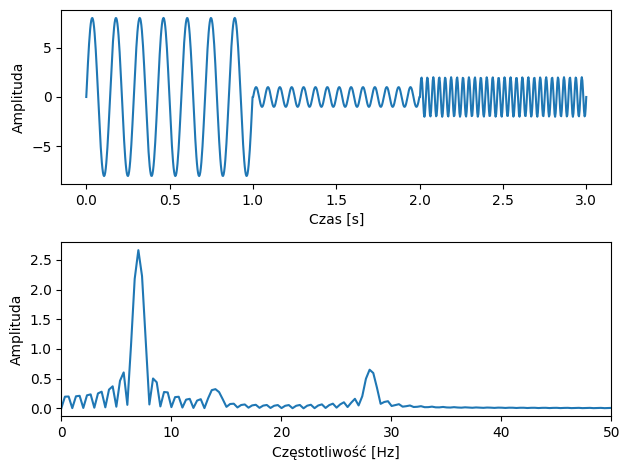

In [40]:
plt.subplot(2, 1, 1)
t=np.linspace(0,3,3*czestotliwosc_probkowania)
plt.plot(t, sygnal)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
transformata=ag.FFT(sygnal)
freq = np.linspace (0, czestotliwosc_probkowania, 3*czestotliwosc_probkowania)
plt.subplot(2, 1, 2)
plt.plot(freq, transformata)
plt.xlim([0,50])
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

plt.tight_layout()

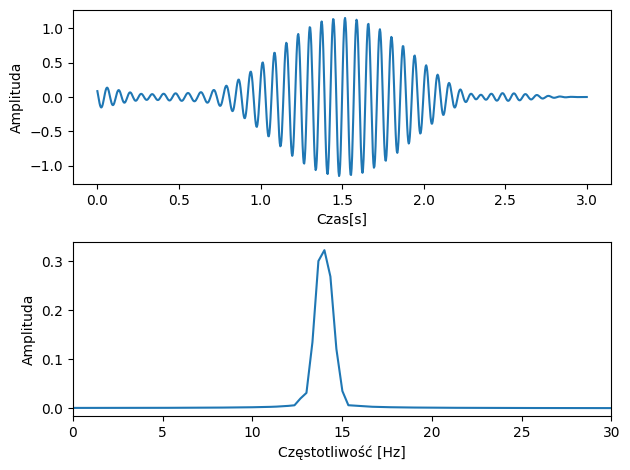

In [41]:
filtr1=ag.pasmowoprzepustowy(sygnal,300,13,15)
FT1=ag.FFT(filtr1)
plt.subplot(2,1,1)
plt.plot(t, filtr1)
plt.xlabel('Czas[s]')
plt.ylabel('Amplituda')
plt.subplot(2,1,2)
plt.plot(freq, FT1)
plt.xlim([0,30])
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.tight_layout()
#użyty filtr pasmowo-przepustowy, gdyż upraszcza i skraca to kod - łatwiej i szybciej jest przepuścić jeden środkowy
#sygnał niż odfiltrować dwa skrajne zakresy filtrem pasmowo-zaporowym

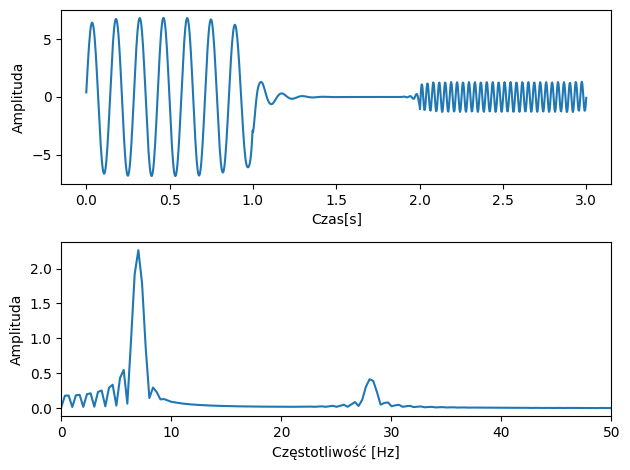

In [43]:
filtr2=ag.pasmowozaporowy(sygnal,300,8,27)
FT2=ag.FFT(filtr2)
plt.subplot(2,1,1)
plt.plot(t, filtr2)
plt.xlabel('Czas[s]')
plt.ylabel('Amplituda')
plt.subplot(2,1,2)
plt.plot(freq, FT2)
plt.xlim([0,50])
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.tight_layout()
#w tym przypadku użyty został filtr pasmowo-zaporowy, aby odfiltrować środkową wartość i zostawić dwie skrajne